# Importação de Bibliotecas:

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Importação de Dados:

In [2]:
df = pd.read_csv('fraud_dataset_example.csv')
df = df.drop(columns=['nameOrig', 'nameDest'])

# Codifica variáveis categóricas:

In [3]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Cria variáveis adicionais:

Novas variáveis foram criadas a partir das variáveis existentes no conjunto de dados original, para fornecer mais informações e ajudar a identificar padrões que podem ser úteis na modelagem preditiva de fraudes.

- errorOrig: Esta variável calcula o erro entre o saldo original antes da transação (oldbalanceOrg), o saldo após a transação (newbalanceOrig), e o montante da transação (amount). Ou seja, Indica a discrepância entre o saldo inicial, o saldo final e o valor da transação para a conta de origem.
  
- errorDest: Calcula o erro entre o saldo original antes da transação do destinatário (oldbalanceDest), o saldo após a transação do destinatário (newbalanceDest), e o montante da transação (amount). Ou seja, indica a discrepância entre o saldo inicial, o saldo final e o valor da transação para a conta de destino.

- balanceOrigChange: Calcula a mudança no saldo da conta de origem após a transação, subtraindo o saldo original (oldbalanceOrg) do saldo após a transação (newbalanceOrig). Ou seja, representa a alteração no saldo da conta de origem após a realização da transação.

- balanceDestChange: Calcula a mudança no saldo da conta de destino após a transação, subtraindo o saldo original do destinatário (oldbalanceDest) do saldo após a transação do destinatário (newbalanceDest). Ou seja, representa a alteração no saldo da conta de destino após a realização da transação.

In [4]:
df['errorOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']
df['balanceOrigChange'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceDestChange'] = df['newbalanceDest'] - df['oldbalanceDest']

# Define features e target:

In [5]:
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
            'errorOrig', 'errorDest', 'balanceOrigChange', 'balanceDestChange']
X = df[features]
y = df['isFraud']

# Divide o DataSet em treino e teste: 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balanceia classes com uso do SMOTE:

In [7]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Padroniza os dados:

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Criação de modelos:

## Treina e avalia dos modelos.

# Modelo de regressão Logística:


Precisão (Classe 0): 1.00 - Quase todas as previsões de não fraude estão corretas.
Recall (Classe 0): 0.74 - O modelo identifica 74% das transações que realmente não são fraudes.
Precisão (Classe 1): 0.00 - Nenhuma das previsões de fraude está correta.
Recall (Classe 1): 0.94 - O modelo identifica 94% das fraudes, mas classifica erroneamente as fraudes como não fraudes.
F1-Score (Classe 1): 0.01 - O modelo tem desempenho muito ruim na detecção de fraudes.
Acurácia: 0.74 - 74% das previsões totais estão corretas.
Macro avg: A média das métricas entre as duas classes.
Weighted avg: Média ponderada das métricas, considerando o desequilíbrio entre as classes.

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     30449
           1       0.00      0.94      0.01        35

    accuracy                           0.74     30484
   macro avg       0.50      0.84      0.43     30484
weighted avg       1.00      0.74      0.85     30484

Logistic Regression - Confusion Matrix:


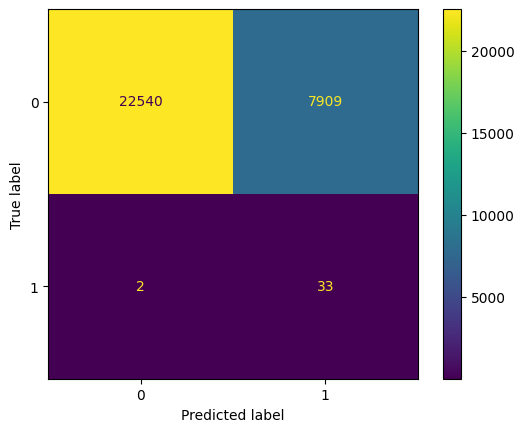

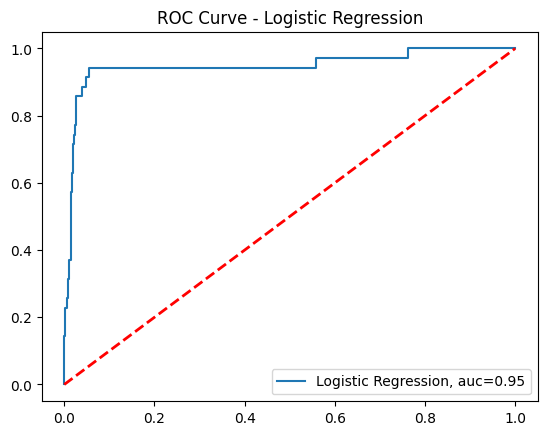

In [9]:
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train_balanced)
y_pred_lr = logistic_regression_model.predict(X_test_scaled)
y_pred_proba_lr = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression - Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.show()

auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression, auc={auc_lr:.2f}")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title('ROC Curve - Logistic Regression')
plt.show()


# Árvore de decisão:

Precisão (Classe 1): 0.88 - 88% das previsões de fraude estão corretas.
Recall (Classe 1): 0.86 - 86% das fraudes são detectadas.
F1-Score (Classe 1): 0.87 - O modelo tem bom desempenho geral em detecção de fraudes.
Acurácia: 1.00 - Quase todas as previsões totais estão corretas.

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30449
           1       0.88      0.86      0.87        35

    accuracy                           1.00     30484
   macro avg       0.94      0.93      0.93     30484
weighted avg       1.00      1.00      1.00     30484

Decision Tree - Confusion Matrix:


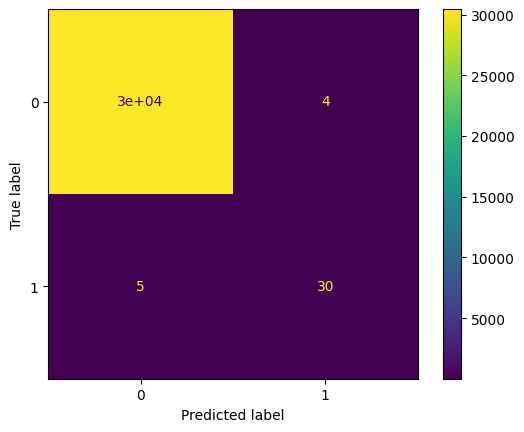

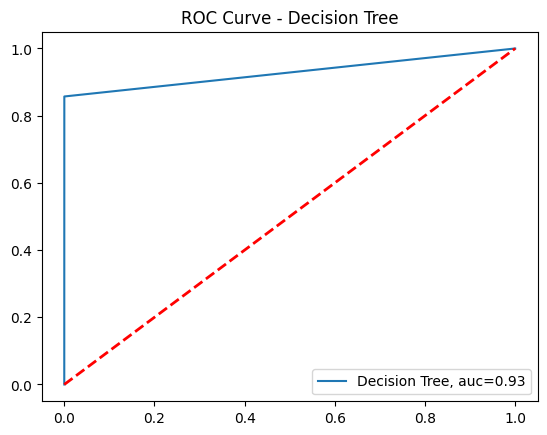

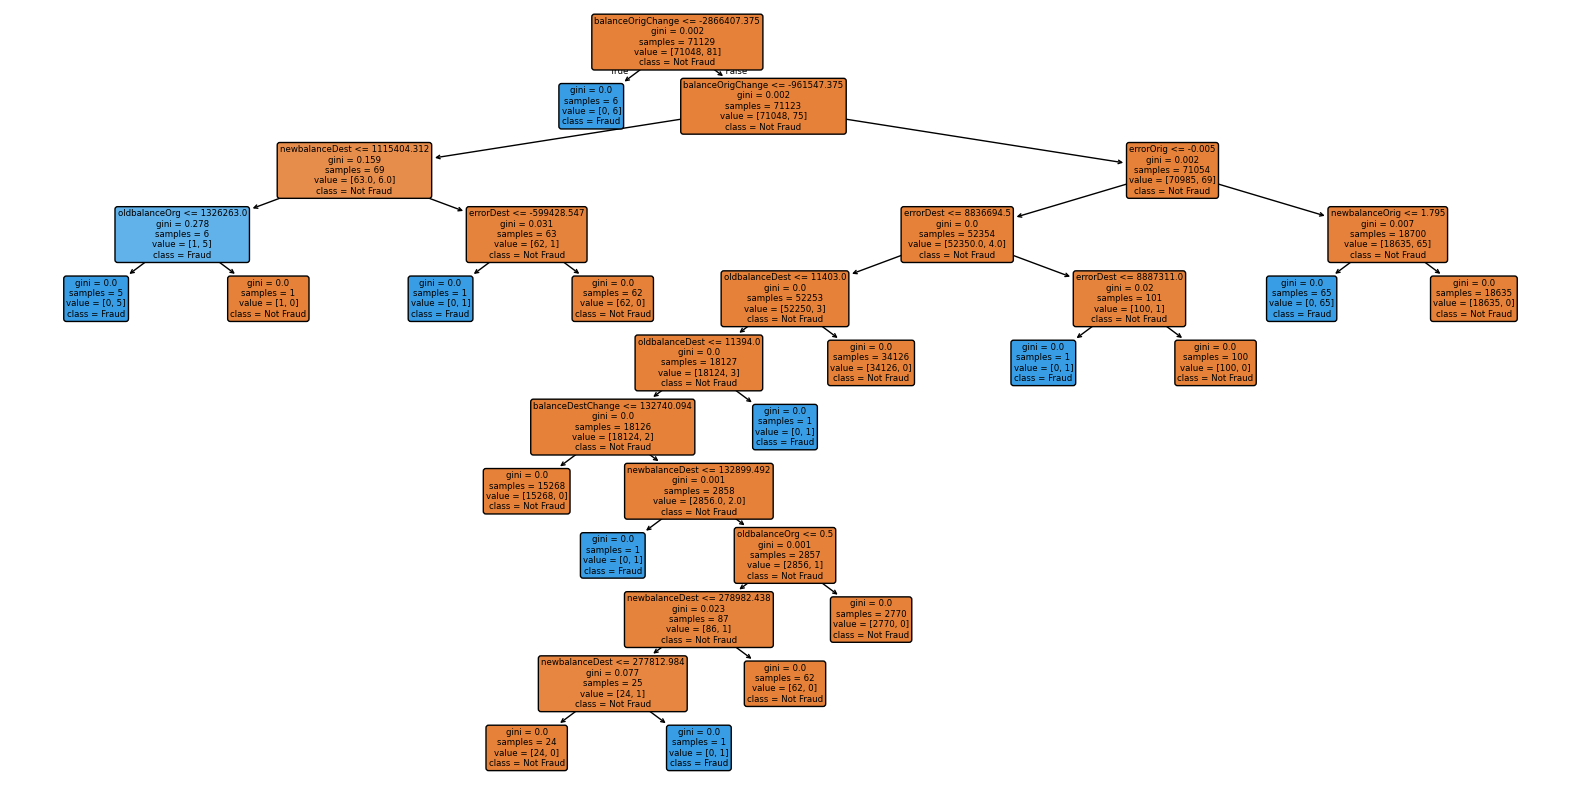

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
y_pred_proba_dt = clf.predict_proba(X_test)[:, 1]

print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot()
plt.show()

auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree, auc={auc_dt:.2f}")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title('ROC Curve - Decision Tree')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=features, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.show()


# Floresta Aleatória:

Precisão (Classe 1): 0.32 - Apenas 32% das previsões de fraude estão corretas.
Recall (Classe 1): 0.94 - O modelo detecta 94% das fraudes.
F1-Score (Classe 1): 0.48 - O desempenho geral é moderado, apesar do recall alto.
Acurácia: 1.00 - Quase todas as previsões totais estão corretas.

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30449
           1       0.32      0.94      0.48        35

    accuracy                           1.00     30484
   macro avg       0.66      0.97      0.74     30484
weighted avg       1.00      1.00      1.00     30484

Random Forest - Confusion Matrix:


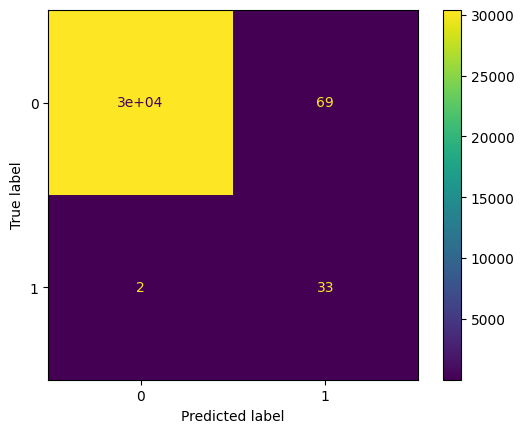

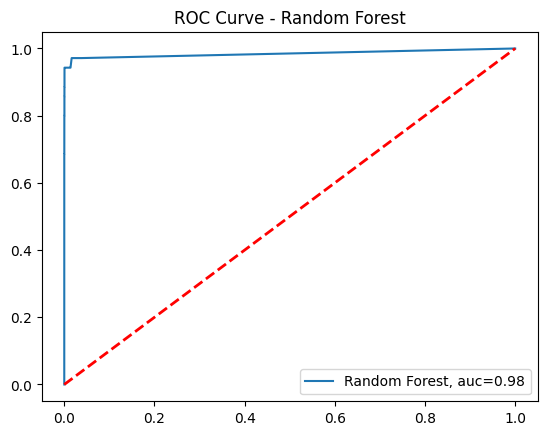

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_balanced)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest - Confusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.show()

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest, auc={auc_rf:.2f}")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title('ROC Curve - Random Forest')
plt.show()

# Aumento de gradiente:

Precisão (Classe 1): 0.09 - Apenas 9% das previsões de fraude estão corretas.
Recall (Classe 1): 0.94 - O modelo detecta 94% das fraudes.
F1-Score (Classe 1): 0.16 - O desempenho geral é muito baixo devido à baixa precisão.
Acurácia: 0.99 - 99% das previsões totais estão corretas.

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     30449
           1       0.09      0.94      0.16        35

    accuracy                           0.99     30484
   macro avg       0.54      0.97      0.58     30484
weighted avg       1.00      0.99      0.99     30484

Gradient Boosting - Confusion Matrix:


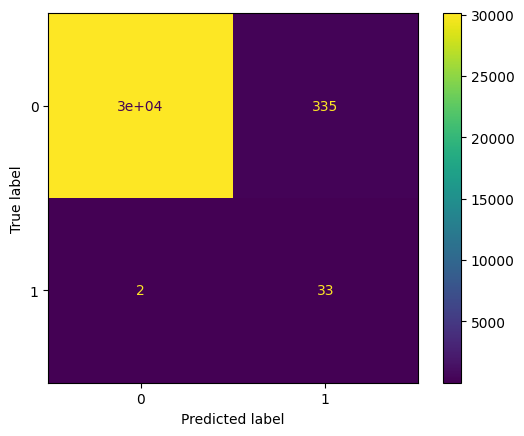

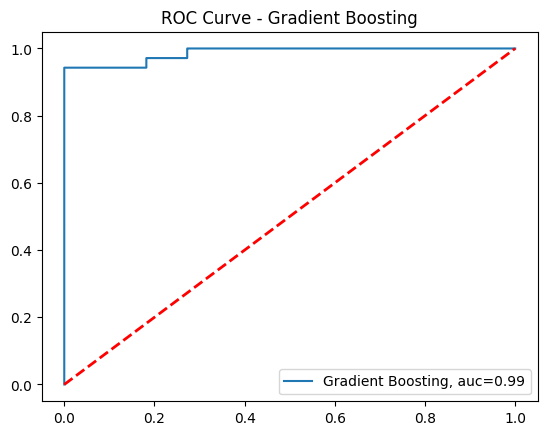

In [12]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train_balanced)
y_pred_gb = gb.predict(X_test_scaled)
y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting - Confusion Matrix:")
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()
plt.show()

auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

plt.figure()
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting, auc={auc_gb:.2f}")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)
plt.title('ROC Curve - Gradient Boosting')
plt.show()

# Análise visual dos dados:

# HeatMap:

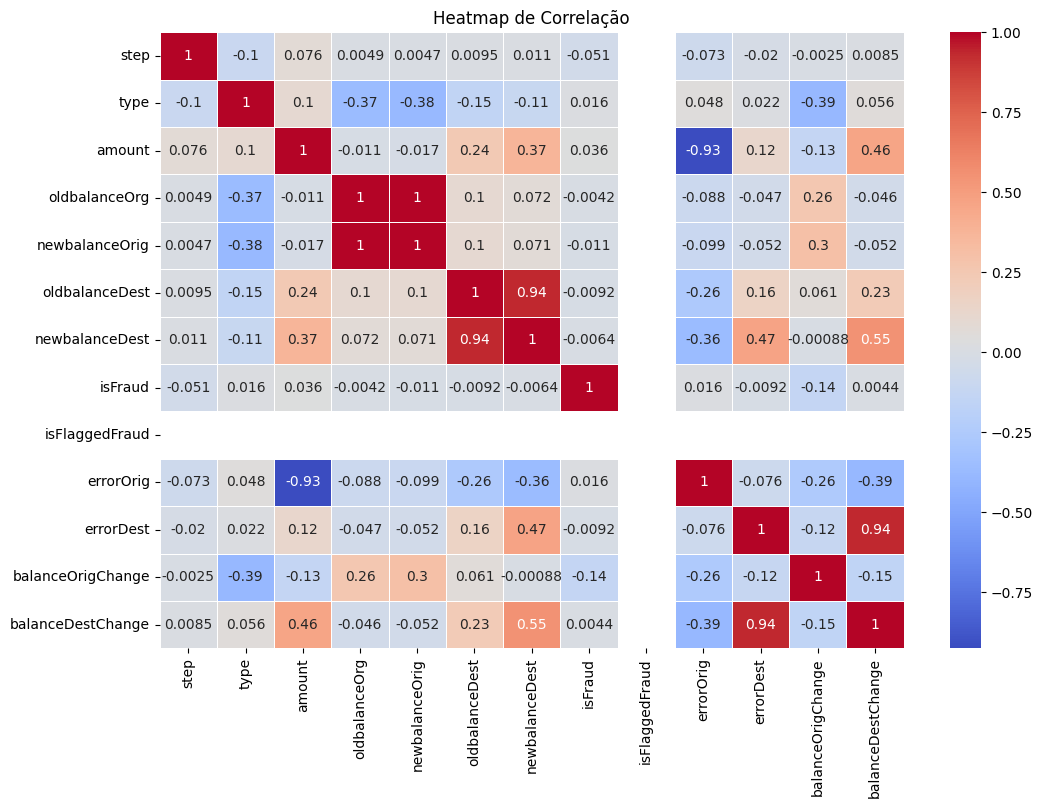

In [13]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

# BoxPlot:

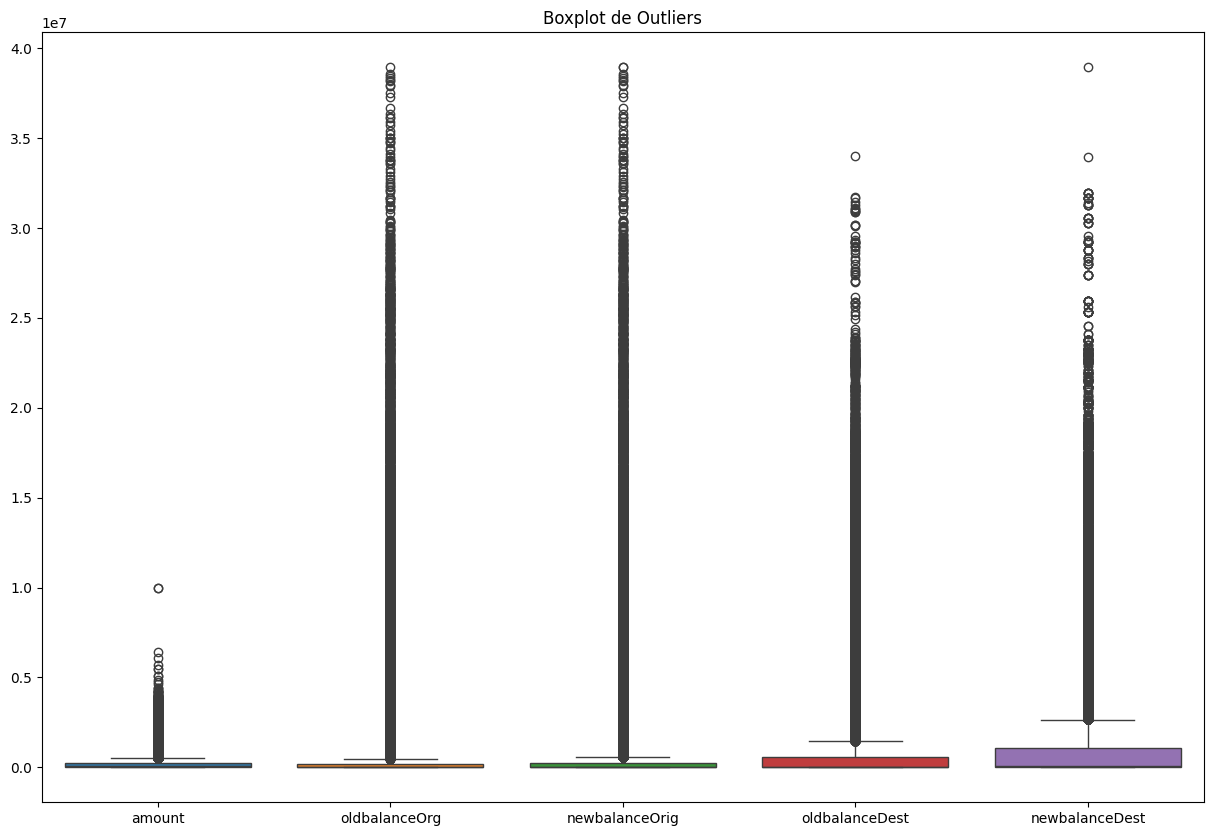

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.title('Boxplot de Outliers')
plt.show()

Distribuição por tipo de transação:

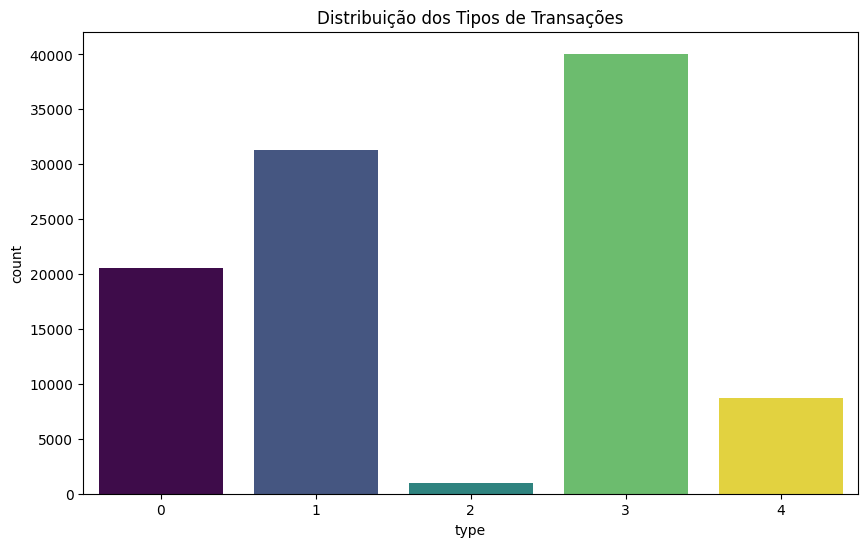

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='type', palette='viridis', dodge=False)
plt.title('Distribuição dos Tipos de Transações')
plt.legend([],[], frameon=False)  
plt.show()

# Distribuição por Fraude:

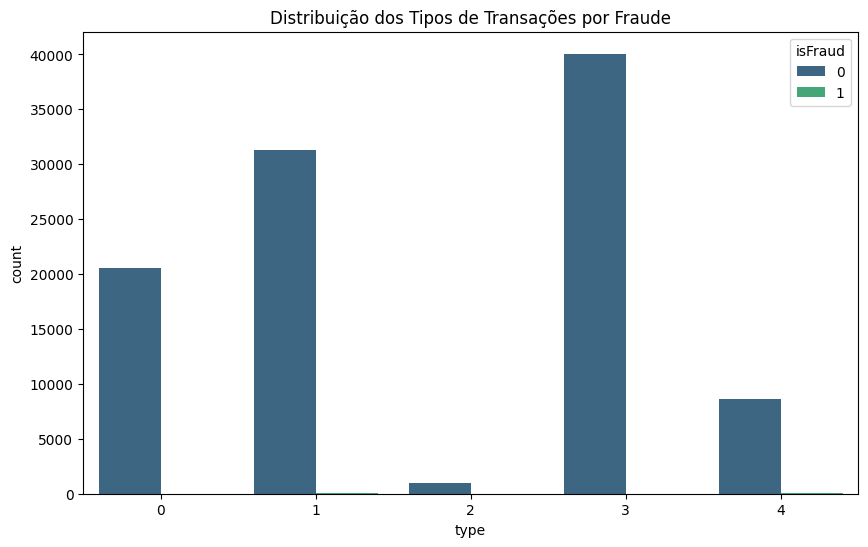

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='isFraud', palette='viridis')
plt.title('Distribuição dos Tipos de Transações por Fraude')
plt.show()

# Conclusões:

Os dados do dataset possuem uma desproporção considerável entre Fraude e Não Fraude (não fraude: 101497 e fraude: 116), portanto, foi necessário fazer o balanceamento dos dados, com técnicas como o SMOTE.

Desta maneira, de acordo com as análises é possível sim detectar fraudes, mas a eficácia da detecção varia dependendo do modelo utilizado. 

Regressão Logística: Alto recall para fraudes, mas praticamente todas as fraudes são classificadas incorretamente como não fraudes (baixa precisão).
Árvore de Decisão: Bom desempenho geral, com alta precisão, recall e F1-Score para ambas as classes.
Floresta Aleatória: Alto recall para fraudes, mas precisão moderada, resultando em um F1-Score intermediário.
Aumento de gradiente: Alto recall para fraudes, mas precisão muito baixa, resultando em um F1-Score muito baixo.

Como se vê, o modelo da Árvore de decisão tem alta precisão e recall, o que gera um bom equilíbrio entre identificação de fraudes e minimização de falsos positivos. O modelo de Floresta aleatória, tem alta capacidade de detectar fraudes (recall), mas com uma precisão moderada, o que significa que há mais falsos positivos em comparação ao modelo citado anteriormente.

Assim, os modelos de Árvore de Decisão e Floresta Aleatória parecem ser os melhores modelos com base nas métricas apresentadas, com a Árvore de Decisão sendo ligeiramente melhor em precisão e recall combinados. 

# Divisão do DataSet para validação:

In [17]:
#from sklearn.preprocessing import LabelEncoder
#import os

#file_path = 'C:/Users/amand/Downloads/fraud transactions example/fraud_dataset_example.csv'
#df_teste = pd.read_csv(file_path)

#linhas_por_arquivo = 33871

#num_arquivos = (len(df_teste) // linhas_por_arquivo) + 1

#output_dir = 'C:/Users/amand/Downloads/fraud transactions example/output_files'
#if not os.path.exists(output_dir):
#    os.makedirs(output_dir)

#for i in range(num_arquivos):
#    inicio = i * linhas_por_arquivo
#    fim = min((i + 1) * linhas_por_arquivo, len(df_teste))  # Garantir que o último arquivo inclua as últimas linhas
#    df_subset = df_teste.iloc[inicio:fim].copy()  # Copiar o subconjunto para evitar alterações no df_teste original

#    df_subset = df_subset.drop(columns=['nameOrig', 'nameDest'])

#    label_encoder = LabelEncoder()
#    df_subset['type'] = label_encoder.fit_transform(df_subset['type'])

#    df_subset['errorOrig'] = df_subset['oldbalanceOrg'] - df_subset['newbalanceOrig'] - df_subset['amount']
#    df_subset['errorDest'] = df_subset['newbalanceDest'] - df_subset['oldbalanceDest'] - df_subset['amount']
#    df_subset['balanceOrigChange'] = df_subset['newbalanceOrig'] - df_subset['oldbalanceOrg']
#    df_subset['balanceDestChange'] = df_subset['newbalanceDest'] - df_subset['oldbalanceDest']

#    output_file_path = os.path.join(output_dir, f'arquivo_dividido_{i+1}.xlsx')
#    df_subset.to_excel(output_file_path, index=False)

#    print(f'Arquivo {i+1} salvo com {len(df_subset)} linhas em {output_file_path}.')

#print('Processo concluído.')

# Uso de novos datasets gerados com 1/3 do dataset original para validação:

# 1º Dataset:

In [20]:
df_novo = pd.read_excel('output_files/arquivo_dividido_1.xlsx')
df_novo.to_csv('output_files/arquivo_dividido_1.csv', index=False)
df_novo.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorOrig,errorDest,balanceOrigChange,balanceDestChange
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0,1.455192e-11,-9839.64,-9839.64,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1.136868e-12,-1864.28,-1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0,0.000000e+00,-181.00,-181.00,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.000000e+00,-21363.00,-181.00,-21182.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.000000e+00,-11668.14,-11668.14,0.0


In [27]:
X_novo = df_novo.drop(columns=['isFraud', 'isFlaggedFraud', 'step', 'type'])
y_novo = df_novo['isFraud']

In [35]:
previsoes_novo_clf = clf.predict(X_novo)
acuracia_novo_clf = accuracy_score(y_novo, previsoes_novo_clf)
relatorio_classificacao_novo_clf = classification_report(y_novo, previsoes_novo_clf)

print("Teste de novo dataset com o modelo treinado da Árvore de Decisão:")
print(f'Acurácia no novo conjunto de dados: {acuracia_novo_clf}')
print('Relatório de Classificação no novo conjunto de dados:')
print(relatorio_classificacao_novo_clf)

Teste de novo dataset com o modelo treinado da Árvore de Decisão:
Acurácia no novo conjunto de dados: 0.9999409524371882
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33785
           1       1.00      0.98      0.99        86

    accuracy                           1.00     33871
   macro avg       1.00      0.99      0.99     33871
weighted avg       1.00      1.00      1.00     33871



In [36]:

previsoes_novo_rf = rf.predict(X_novo)
acuracia_novo_rf = accuracy_score(y_novo, previsoes_novo_rf)
relatorio_classificacao_novo_rf = classification_report(y_novo, previsoes_novo_rf)

print("\nTeste de novo dataset com o modelo treinado da Floresta Aleatória:")
print(f'Acurácia no novo conjunto de dados: {acuracia_novo_rf}')
print('Relatório de Classificação no novo conjunto de dados:')
print(relatorio_classificacao_novo_rf)



Teste de novo dataset com o modelo treinado da Floresta Aleatória:
Acurácia no novo conjunto de dados: 0.63290130199876
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     33785
           1       0.00      0.45      0.01        86

    accuracy                           0.63     33871
   macro avg       0.50      0.54      0.39     33871
weighted avg       1.00      0.63      0.77     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [45]:

y_pred_lr_novo = logistic_regression_model.predict(X_novo)
y_pred_proba_lr_novo = logistic_regression_model.predict_proba(X_novo)[:, 1]

print("\nTeste de novo dataset com o modelo treinado da Regressão Logística:")
acuracia_lr_novo = accuracy_score(y_novo, y_pred_lr_novo)
print(f'Acurácia no novo conjunto de dados: {acuracia_lr_novo}')
print('Relatório de Classificação no novo conjunto de dados:')
print(classification_report(y_novo, y_pred_lr_novo))


Teste de novo dataset com o modelo treinado da Regressão Logística:
Acurácia no novo conjunto de dados: 0.5685985060966608
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.57      0.72     33785
           1       0.00      0.10      0.00        86

    accuracy                           0.57     33871
   macro avg       0.50      0.34      0.36     33871
weighted avg       0.99      0.57      0.72     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [46]:
y_pred_gb_novo = gb.predict(X_novo)
y_pred_proba_gb_novo = gb.predict_proba(X_novo)[:, 1]

print("\nTeste de novo dataset com o modelo treinado de Gradient Boosting:")
acuracia_gb_novo = accuracy_score(y_novo, y_pred_gb_novo)
print(f'Acurácia no novo conjunto de dados: {acuracia_gb_novo}')
print('Relatório de Classificação no novo conjunto de dados:')
print(classification_report(y_novo, y_pred_gb_novo))


Teste de novo dataset com o modelo treinado de Gradient Boosting:
Acurácia no novo conjunto de dados: 0.9107200850284904
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     33785
           1       0.01      0.37      0.02        86

    accuracy                           0.91     33871
   macro avg       0.50      0.64      0.49     33871
weighted avg       1.00      0.91      0.95     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


## 2º Dataset:

In [39]:
df_novo_2 = pd.read_excel('output_files/arquivo_dividido_2.xlsx')
df_novo_2.to_csv('output_files/arquivo_dividido_1.csv', index=False)
df_novo_2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorOrig,errorDest,balanceOrigChange,balanceDestChange
0,8,3,4622.68,11130.00,6507.32,0.00,0.00,0,0,0.000000e+00,-4622.68,-4622.68,0.00
1,8,3,7341.63,6507.32,0.00,0.00,0.00,0,0,-8.343100e+02,-7341.63,-6507.32,0.00
2,8,3,7115.10,70028.59,62913.49,0.00,0.00,0,0,-1.818989e-12,-7115.10,-7115.10,0.00
3,8,1,276861.31,62913.49,0.00,868119.25,1295505.56,0,0,-2.139478e+05,150525.00,-62913.49,427386.31
4,8,1,173974.32,0.00,0.00,671186.52,1088598.75,0,0,-1.739743e+05,243437.91,0.00,417412.23


In [40]:
X_novo_2 = df_novo_2.drop(columns=['isFraud', 'isFlaggedFraud', 'step', 'type'])
y_novo_2 = df_novo_2['isFraud']

In [41]:
previsoes_novo_clf_2 = clf.predict(X_novo_2)
acuracia_novo_clf_2 = accuracy_score(y_novo_2, previsoes_novo_clf_2)
relatorio_classificacao_novo_clf_2 = classification_report(y_novo_2, previsoes_novo_clf_2)

print("Teste de dataset 2 com o modelo treinado da Árvore de Decisão:")
print(f'Acurácia no novo conjunto de dados: {acuracia_novo_clf_2}')
print('Relatório de Classificação no novo conjunto de dados:')
print(relatorio_classificacao_novo_clf_2)

Teste de dataset 2 com o modelo treinado da Árvore de Decisão:
Acurácia no novo conjunto de dados: 0.9998819048743763
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33852
           1       0.94      0.84      0.89        19

    accuracy                           1.00     33871
   macro avg       0.97      0.92      0.94     33871
weighted avg       1.00      1.00      1.00     33871



In [42]:
previsoes_novo_rf_2 = rf.predict(X_novo_2)
acuracia_novo_rf_2 = accuracy_score(y_novo_2, previsoes_novo_rf_2)
relatorio_classificacao_novo_rf_2 = classification_report(y_novo_2, previsoes_novo_rf_2)

print("\nTeste de dataset 2 com o modelo treinado da Floresta Aleatória:")
print(f'Acurácia no novo conjunto de dados: {acuracia_novo_rf_2}')
print('Relatório de Classificação no novo conjunto de dados:')
print(relatorio_classificacao_novo_rf_2)


Teste de dataset 2 com o modelo treinado da Floresta Aleatória:
Acurácia no novo conjunto de dados: 0.7505240471199551
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86     33852
           1       0.00      0.42      0.00        19

    accuracy                           0.75     33871
   macro avg       0.50      0.59      0.43     33871
weighted avg       1.00      0.75      0.86     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [44]:
y_pred_lr_novo_2 = logistic_regression_model.predict(X_novo_2)
y_pred_proba_lr_novo_2 = logistic_regression_model.predict_proba(X_novo_2)[:, 1]

print("\nTeste de novo dataset com o modelo treinado da Regressão Logística:")
acuracia_lr_novo_2 = accuracy_score(y_novo_2, y_pred_lr_novo_2)
print(f'Acurácia no novo conjunto de dados: {acuracia_lr_novo_2}')
print('Relatório de Classificação no novo conjunto de dados:')
print(classification_report(y_novo_2, y_pred_lr_novo_2))


Teste de novo dataset com o modelo treinado da Regressão Logística:
Acurácia no novo conjunto de dados: 0.4911576274689262
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     33852
           1       0.00      0.11      0.00        19

    accuracy                           0.49     33871
   macro avg       0.50      0.30      0.33     33871
weighted avg       1.00      0.49      0.66     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [49]:
y_pred_gb_novo_2 = gb.predict(X_novo_2)
y_pred_proba_gb_novo_2 = gb.predict_proba(X_novo_2)[:, 1]

print("\nTeste de dataset 2 com o modelo treinado de Gradient Boosting:")
acuracia_gb_novo_2 = accuracy_score(y_novo_2, y_pred_gb_novo_2)
print(f'Acurácia no novo conjunto de dados: {acuracia_gb_novo_2}')
print('Relatório de Classificação no novo conjunto de dados:')
print(classification_report(y_novo_2, y_pred_gb_novo_2))



Teste de dataset 2 com o modelo treinado de Gradient Boosting:
Acurácia no novo conjunto de dados: 0.875084880871542
Relatório de Classificação no novo conjunto de dados:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     33852
           1       0.00      0.63      0.01        19

    accuracy                           0.88     33871
   macro avg       0.50      0.75      0.47     33871
weighted avg       1.00      0.88      0.93     33871



C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\amand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


# Conclusão: 

A árvore de decisão se destaca como o modelo mais eficaz para estes conjuntos de dados específicos, com a mais alta acurácia e F1-score significativo para a classe de fraude. Portanto, para a detecção de fraudes neste contexto específico, recomenda-se a utilização da árvore de decisão devido ao seu desempenho superior em termos de acurácia e capacidade de detectar fraudes.